In [87]:
import json
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.colors as mcolors
import random


In [88]:
def interaction_matrix(path):
    '''Retourne la matrice d'interaction ou Aij
    correpond au nombre de fois que le neud i transitionne
    vers j avec le dictionnaire label : id'''
    with open(path) as f:
        data = json.load(f)
    label_id=dict()
    transitions= dict()
    for melodie in data:
        for i in range(len(melodie)-1):
            splitted_x =melodie[i].split('-')
            splitted_y =melodie[i+1].split('-')
            #si la note contient un tiret ou pas
            x = splitted_x[0] if len(splitted_x)==2 else "-".join(substring for substring in splitted_x[:-1])
            y= splitted_y[0] if len(splitted_y)==2 else "-".join(substring for substring in splitted_y[:-1]) 
            if x not in label_id:
                label_id[x]= len(label_id)
            if y not in label_id:
                label_id[y]= len(label_id)
            key_transition= x+" "+y
            if key_transition not in transitions:
                transitions[key_transition]=0
            transitions[key_transition]+=1
    A= np.zeros((len(label_id),len(label_id)))
    for t in transitions:
        x,y=t.split(' ')
        A[label_id[x],label_id[y]]= transitions[t]
    return A,label_id
    
    
A,labels=interaction_matrix('Data/datasetA.json')


DiGraph with 80 nodes and 958 edges


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6120\1375234557.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6120\1375234557.py:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


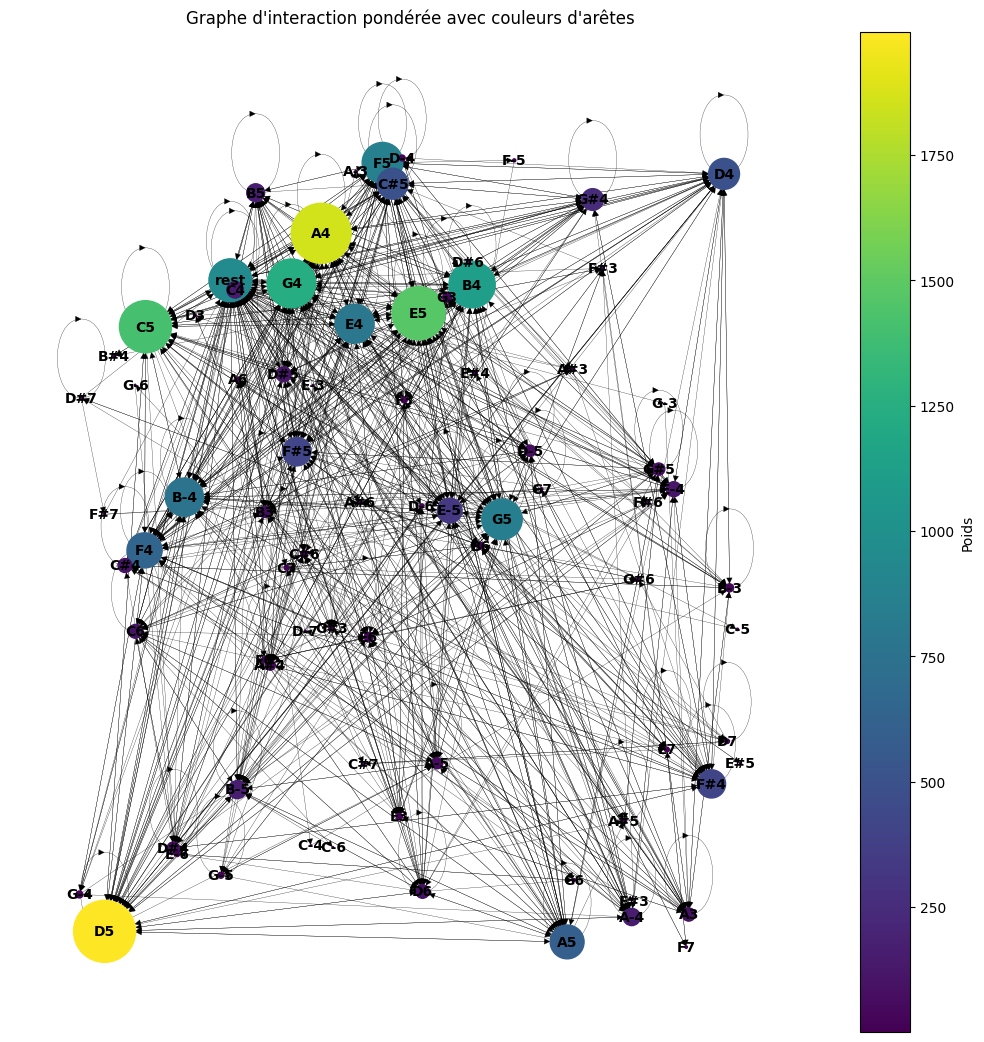

In [89]:
# Créer un graphe vide
G = nx.DiGraph()
plt.figure(figsize=(10,10))

# Ajouter des nœuds au graphe
G.add_nodes_from(labels)
num_nodes=len(labels)

# Ajouter des arêtes pondérées au graphe en fonction de la matrice d'interaction avec poids
for i in labels:
    for j in labels:
        weight = A[labels[i],labels[j]]
        if weight > 0:
            G.add_edge(i, j, weight=weight)

print(G)         
cmap = plt.cm.get_cmap('viridis')             
nodes_weight= [np.sum(A[:,i]) for i in range(num_nodes)]


# Associer les couleurs les degres entrant des noeuds
norm = mcolors.Normalize(vmin=min(nodes_weight), vmax=max(nodes_weight))
nodes_colors = [cmap(norm(w)) for w in nodes_weight]



pos = nx.random_layout(G)
# Dessiner le graphe avec des arêtes pondérées
nx.draw(G,pos, with_labels=True, node_color=nodes_colors, node_size=nodes_weight, font_size=10, font_weight='bold',width=0.2)


#a tester de separe les affichages
'''
nx.draw_networkx_nodes(G, pos, nodelist=nodes_with_poids_particulier, node_color='skyblue', node_size=1000, font_size=10, font_weight='bold')
nx.draw_networkx_labels(G, pos, labels={node: node for node in nodes_with_poids_particulier})
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color='gray', width=1.5)'''

# Ajouter une barre de couleur pour indiquer la correspondance poids-couleur
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Poids')

plt.title("Graphe d'interaction pondérée avec couleurs d'arêtes")
plt.show()

In [90]:
# A garder juste pour vérifier la correspondance avec les histogrammes, etc. 

def create_graph_visualization_byorder(path):
    # Charger les données, puis créer la matrice d'interaction et les étiquettes
    A,labels=interaction_matrix(path)
    with open(path) as f:
        data = json.load(f)
    label_id = dict()
    transitions = dict()
    for melodie in data:
        for i in range(len(melodie) - 1):
            splitted_x = melodie[i].split('-')
            splitted_y = melodie[i + 1].split('-')
            x = splitted_x[0] if len(splitted_x) == 2 else "-".join(substring for substring in splitted_x[:-1])
            y = splitted_y[0] if len(splitted_y) == 2 else "-".join(substring for substring in splitted_y[:-1])
            if x not in label_id:
                label_id[x] = len(label_id)
            if y not in label_id:
                label_id[y] = len(label_id)
            key_transition = x + " " + y
            if key_transition not in transitions:
                transitions[key_transition] = 0
            transitions[key_transition] += 1
    A = np.zeros((len(label_id), len(label_id)))
    for t in transitions:
        x, y = t.split(' ')
        A[label_id[x], label_id[y]] = transitions[t]    

# Créer un graphe dirigé à partir de la matrice d'interaction
    G = nx.DiGraph()
    G.add_nodes_from(labels)
    num_nodes = len(labels)
    plt.figure(figsize=(10,10))

    # Ajout des arêtes pondérées au graphe 
    for i in labels:
        for j in labels:
            weight = A[labels[i],labels[j]]
            if weight > 0:
                G.add_edge(i, j, weight=weight)

    # Calcul de la taille des noeuds en fonction du poids total des arêtes entrantes
    node_weights = {node: np.sum(A[:, label_id[node]]) for node in G.nodes()}
    node_sizes = [node_weights[node] for node in G.nodes()]
    
    # Trier les noeuds par leur poids
    sorted_nodes = sorted(G.nodes(), key=lambda node: node_weights[node], reverse=True)

    # Assigner des positions dans un cercle en fonction d'un ordre trié
    pos = {}
    for i, node in enumerate(sorted_nodes):
        angle = 2 * np.pi * i / num_nodes
        pos[node] = (np.cos(angle), np.sin(angle))

    # Dessiner le ghraphe 
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, cmap=plt.cm.plasma)
    nx.draw_networkx_labels(G, pos, font_size=8)
    
    # Avec différentes couleurs et transparence d'arêtes
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
    edge_colors = [plt.cm.plasma(weight / max(weights)) for weight in weights]
    edge_widths = [(weight / max(weights) * 5) + 0.1 for weight in weights]
    
    for (source, target, weight), color, width in zip(G.edges(data='weight'), edge_colors, edge_widths):
        alpha = 0.1 if weight < np.mean(weights) else 0.9  # Adjust transparency based on weight
        nx.draw_networkx_edges(G, pos, edgelist=[(source, target)], width=width,
                               alpha=alpha, edge_color=[color], arrowstyle='->', arrowsize=10)
        
    # Barre de couleur pour les poids des noeuds
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(node_sizes), vmax=max(node_sizes)))
    sm.set_array([])
    plt.colorbar(sm, label='Node Weight')

    plt.title("Graphe d'interaction pondérée avec couleurs d'arêtes et ordre des noeuds")
    plt.axis('equal')  
    plt.show()



C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6120\3305320669.py:72: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node Weight')


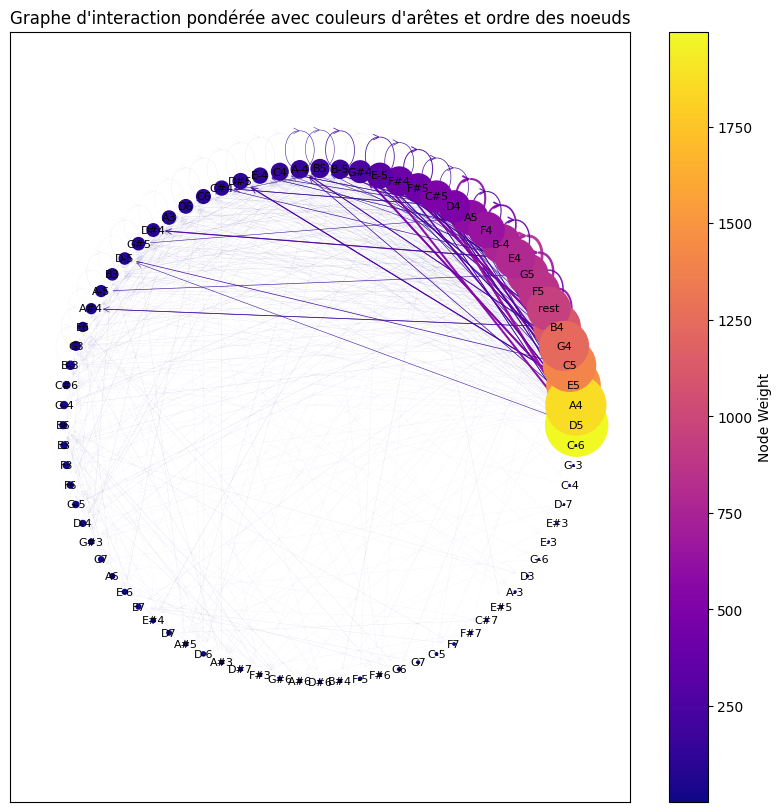

In [91]:
create_graph_visualization_byorder('Data/datasetA.json')

In [92]:
def create_graph_visualization(path):

    A,labels=interaction_matrix(path)

    #Charger les données, puis créer la matrice d'interaction et les étiquettes
    with open(path) as f:
        data = json.load(f)

    label_id = dict()
    transitions = dict()
    max_label_id = -1  # Initialisation à -1 pour commencer l'indexation à 0


    for melodie in data:
        for i in range(len(melodie) - 1):
            splitted_x = melodie[i].split('-')
            splitted_y = melodie[i + 1].split('-')
            x = splitted_x[0] if len(splitted_x) == 2 else "-".join(substring for substring in splitted_x[:-1])
            y = splitted_y[0] if len(splitted_y) == 2 else "-".join(substring for substring in splitted_y[:-1])

            
            if x not in label_id:
                label_id[x] = len(label_id)
            if y not in label_id:
                label_id[y] = len(label_id)
            key_transition = x + " " + y
            if key_transition not in transitions:
                transitions[key_transition] = 0
            transitions[key_transition] += 1
    A = np.zeros((len(label_id), len(label_id)))
    for t in transitions:
        x, y = t.split(' ')
        A[label_id[x], label_id[y]] = transitions[t]   

    # Créer un graphe dirigé à partir de la matrice d'interaction
    G = nx.DiGraph()
    G.add_nodes_from(labels)
    num_nodes = len(labels)
    plt.figure(figsize=(10, 10))  

    # Ajout des arêtes pondérées au graphe 
    for i in labels:
        for j in labels:
            weight = A[labels[i], labels[j]]
            if weight > 0:
                G.add_edge(i, j, weight=weight)

    # Calcul de la taille des noeuds en fonction du poids total des arêtes entrantes
    node_weights = {node: np.sum(A[:, label_id[node]]) for node in G.nodes()}
    node_sizes = [node_weights[node] for node in G.nodes()]

    # Determine le seuil d'affichage des etiquettes (exemple : 75e percentile ici)
    label_display_threshold = np.percentile(node_sizes, 75)

    # Attribuer aux noeuds des positions aléatoires dans un cercle
    # Et trier les noeuds par poids
    sorted_nodes_by_weight = sorted(G.nodes(data=True), key=lambda x: node_weights[x[0]], reverse=True)

    # Placer le plus gros noeud de maniere aléatoire, et placer les autres noeuds en verifiant les distances, pour éviter les chevauchements des noeuds interessants à afficher
    pos = {}
    angles_used = set()
    for node, data in sorted_nodes_by_weight:
        while True:
            angle = random.uniform(0, 2 * np.pi)
            if all(not np.isclose(angle, used_angle, atol=0.05) for used_angle in angles_used):  # atol dépend de la répartition que l'on souhaite 
                angles_used.add(angle)
                pos[node] = (np.cos(angle), np.sin(angle))
                break

    
    # Dessiner le ghraphe, en utilisant les positions 
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, cmap=plt.cm.plasma)

    # N'afficher les étiquettes que des noeuds selectionnés avec le seuil
    labels_to_draw = {node: node for node, size in zip(G.nodes(), node_sizes) if size >= label_display_threshold}
    nx.draw_networkx_labels(G, pos, labels=labels_to_draw, font_size=8)
    
    weights = [data['weight'] for source, target, data in G.edges(data=True)]

    # Trier les arêtes par poids, pour que les arêtes de poids plus élevés soient dessinées en dernier (au dessus des autres)
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    

    # Avec différentes couleurs et transparence d'arêtes
    for (source, target, data) in sorted_edges:
        weight = data['weight']
        color = plt.cm.plasma(weight / max(weights))
        width = (weight / max(weights) * 5) + 0.1
        alpha = 0.1 if weight < np.mean(weights) else 0.9  # régler la transparence en fonction du poids
        nx.draw_networkx_edges(G, pos, edgelist=[(source, target)], width=width,
                               alpha=alpha, edge_color=[color], arrowstyle='->', arrowsize=10)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(node_sizes), vmax=max(node_sizes)))
    sm.set_array([])    
    plt.title("Graphe d'interaction pondérée avec couleurs d'arêtes")
    plt.colorbar(sm, label='Poids')
    plt.axis('equal')  
    plt.show()


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6120\4029102951.py:96: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Poids')


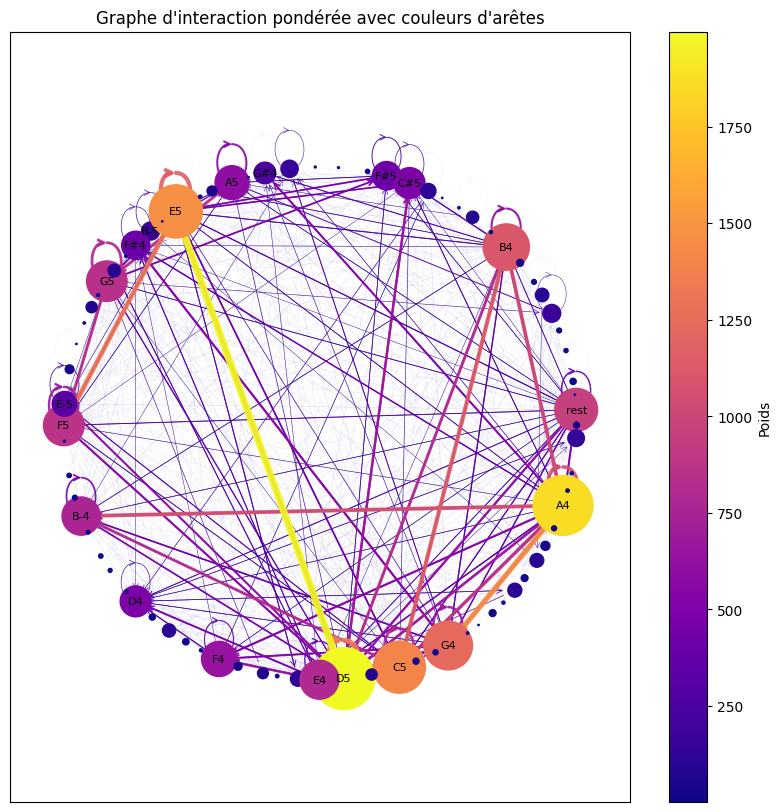

In [65]:
create_graph_visualization('Data/datasetA.json')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6120\4029102951.py:96: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Poids')


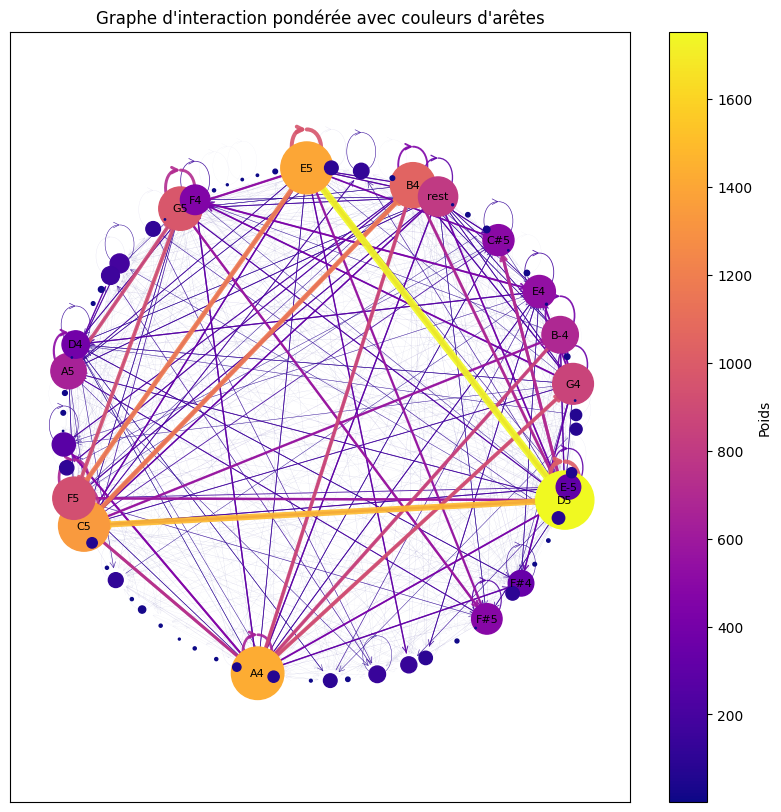

In [94]:
create_graph_visualization('Data/datasetB.json')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6120\4029102951.py:96: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Poids')


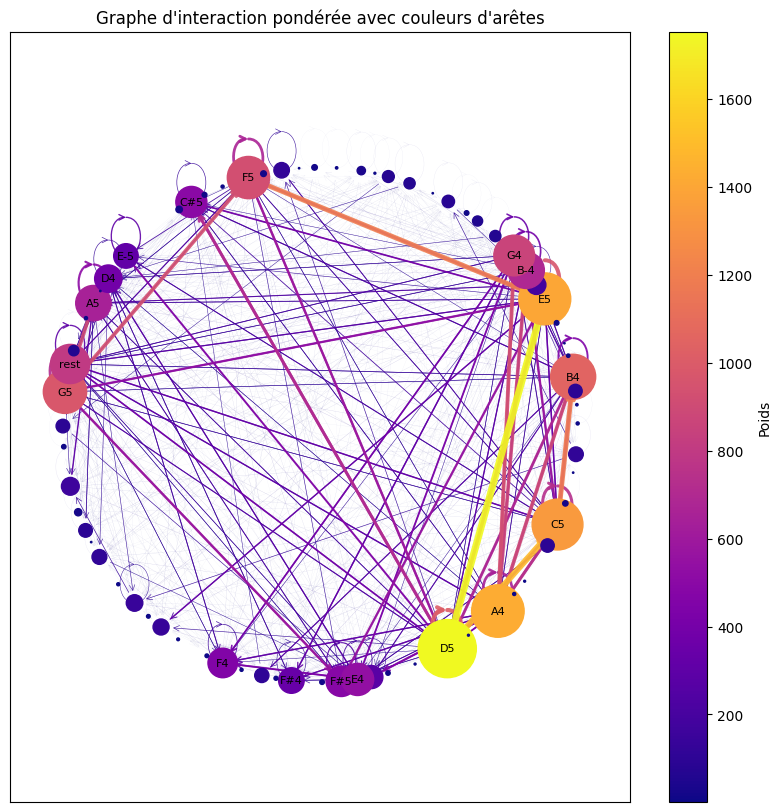

In [95]:
create_graph_visualization('Data/datasetB.json')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6120\4029102951.py:96: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Poids')


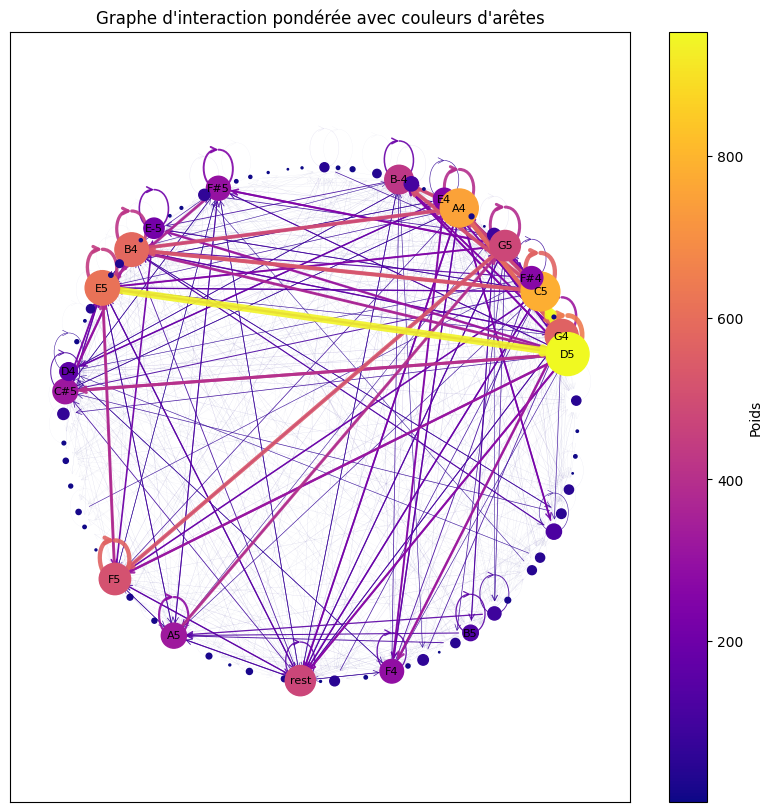

In [97]:
create_graph_visualization('Data/datasetC.json')

In [135]:
#Version ajustée pour l'affichage des noeuds, pour le datasetD , qui a peu de données (peu de partitions avec des parties D)

def create_graph_visualization(path):

    A,labels=interaction_matrix(path)

    #Charger les données, puis créer la matrice d'interaction et les étiquettes
    with open(path) as f:
        data = json.load(f)

    label_id = dict()
    transitions = dict()
    max_label_id = -1  # Initialisation à -1 pour commencer l'indexation à 0


    for melodie in data:
        for i in range(len(melodie) - 1):
            splitted_x = melodie[i].split('-')
            splitted_y = melodie[i + 1].split('-')
            x = splitted_x[0] if len(splitted_x) == 2 else "-".join(substring for substring in splitted_x[:-1])
            y = splitted_y[0] if len(splitted_y) == 2 else "-".join(substring for substring in splitted_y[:-1])

            
            if x not in label_id:
                label_id[x] = len(label_id)
            if y not in label_id:
                label_id[y] = len(label_id)
            key_transition = x + " " + y
            if key_transition not in transitions:
                transitions[key_transition] = 0
            transitions[key_transition] += 1
    A = np.zeros((len(label_id), len(label_id)))
    for t in transitions:
        x, y = t.split(' ')
        A[label_id[x], label_id[y]] = transitions[t]   

    # Créer un graphe dirigé à partir de la matrice d'interaction
    G = nx.DiGraph()
    G.add_nodes_from(labels)
    num_nodes = len(labels)
    plt.figure(figsize=(10, 10))  

    # Ajout des arêtes pondérées au graphe 
    for i in labels:
        for j in labels:
            weight = A[labels[i], labels[j]]
            if weight > 0:
                G.add_edge(i, j, weight=weight)

    # Calcul de la taille des noeuds en fonction du poids total des arêtes entrantes
    node_weights = {node: np.sum(A[:, label_id[node]]) for node in G.nodes()}
    node_sizes = [node_weights[node] for node in G.nodes()]

    # Determine le seuil d'affichage des etiquettes (exemple : 75e percentile ici)
    label_display_threshold = np.percentile(node_sizes, 1)

    # Attribuer aux noeuds des positions aléatoires dans un cercle
    # Et trier les noeuds par poids
    sorted_nodes_by_weight = sorted(G.nodes(data=True), key=lambda x: node_weights[x[0]], reverse=True)

    # Placer le plus gros noeud de maniere aléatoire, et placer les autres noeuds en verifiant les distances, pour éviter les chevauchements des noeuds interessants à afficher
    pos = {}
    angles_used = set()
    for node, data in sorted_nodes_by_weight:
        while True:
            angle = random.uniform(0, 2 * np.pi)
            if all(not np.isclose(angle, used_angle, atol=0.05) for used_angle in angles_used):  # atol dépend de la répartition que l'on souhaite 
                angles_used.add(angle)
                pos[node] = (np.cos(angle), np.sin(angle))
                break

    
    # Dessiner le ghraphe, en utilisant les positions 
    max_weight = max(node_weights.values())
    node_size_factor = 3
    # Ajuster la taille des nœuds en fonction de leurs poids
    node_sizes = [(node_weight / max_weight * 300 + 50) * node_size_factor for node_weight in node_weights.values()]

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, cmap=plt.cm.plasma)

    # N'afficher les étiquettes que des noeuds selectionnés avec le seuil
    labels_to_draw = {node: node for node, size in zip(G.nodes(), node_sizes) if size >= label_display_threshold}
    nx.draw_networkx_labels(G, pos, labels=labels_to_draw, font_size=8)
    
    weights = [data['weight'] for source, target, data in G.edges(data=True)]

    # Trier les arêtes par poids, pour que les arêtes de poids plus élevés soient dessinées en dernier (au dessus des autres)
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    

    # Avec différentes couleurs et transparence d'arêtes
    for (source, target, data) in sorted_edges:
        weight = data['weight']
        color = plt.cm.plasma(weight / max(weights))
        width = (weight / max(weights) * 5) + 0.1
        alpha = 0.1 if weight < np.mean(weights) else 0.9  # régler la transparence en fonction du poids
        nx.draw_networkx_edges(G, pos, edgelist=[(source, target)], width=width,
                               alpha=alpha, edge_color=[color], arrowstyle='->', arrowsize=10)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(node_sizes), vmax=max(node_sizes)))
    sm.set_array([])    
    plt.title("Graphe d'interaction pondérée avec couleurs d'arêtes")
    plt.colorbar(sm, label='Poids')
    plt.axis('equal')  
    plt.show()


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6120\156776059.py:103: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Poids')


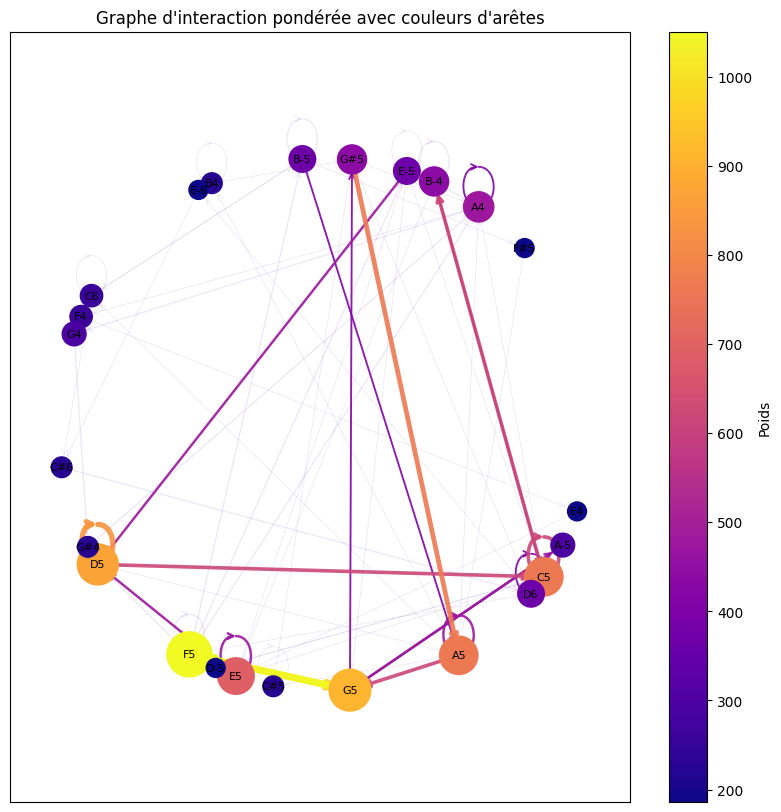

In [142]:
create_graph_visualization('Data/datasetD.json')